In [2]:
from ROOT import TH1D, TCanvas, TF1, std
from pyLCIO import EVENT, UTIL, IOIMPL, IMPL
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py 
import awkward1 as ak 
import pandas as pd
plt.rcParams.update({'font.size': 17})

##conda install awkward1 -c conda-forge

from functions import CellIDDecoder
from scipy.stats import norm

In [3]:
fName="nom50GeV_z5cm.slcio"
collection = 'ECalBarrelSiHitsOdd'
reader = IOIMPL.LCFactory.getInstance().createLCReader()
reader.open( fName )

In [34]:
maxEvt = 10
nEvt = 0

binX = np.arange(-81, 82, 5.088333)
binZ = np.arange(-77, 78, 5.088333)
binY = np.arange(1800, 2058, 1)
binL = np.arange(0, 30, 1)
    
b = ak.ArrayBuilder()

for evt in reader:
    nEvt += 1
    if nEvt > maxEvt:
        break
    
    b.begin_list()
    ecalBarrel = evt.getCollection(collection)
    cellIDString = ecalBarrel.getParameters().getStringVal("CellIDEncoding")
    decoder = CellIDDecoder( cellIDString ) 
    for hit in ecalBarrel:
         
        l = decoder.layer( hit.getCellID0() ) 
        e = hit.getEnergy()
        pos = hit.getPosition()
        b.begin_record() 
        b.field("x")
        b.real(pos[0])
        b.field("y")
        b.real(pos[1])
        b.field("z")
        b.real(pos[2])
        b.field("e")
        b.real(e * 1000)
        b.field("layer")
        b.integer(l)
        b.end_record() 
        
    b.end_list()
    
    

In [36]:
H, xedges, yedges = np.histogram2d(ak.to_numpy(b[4].z), ak.to_numpy(b[4].x), bins=(binZ, binX), weights=ak.to_numpy(b[4].e))

In [30]:
#print (b[0].y[0], b[0].layer[0])
binL = np.arange(0, 30, 1)
binX.shape

(33,)

In [42]:
#np.sort(ak.to_numpy(b[6].layer))
#bsort = ak.sort(b[0])
#bsort.x

<Array [-391, -170, ... 1.83e+03, 1.83e+03] type='550 * float64'>

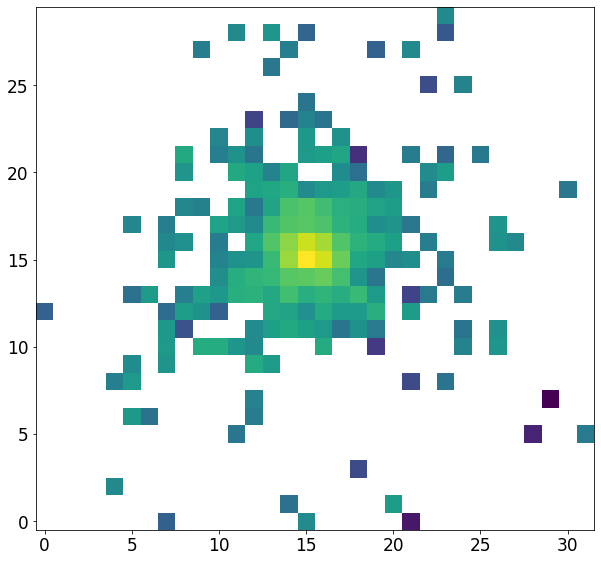

In [109]:
cmap = mpl.cm.viridis
fig, ax = plt.subplots(figsize=(10,15))
plt.imshow(H, filternorm=False, interpolation='none', cmap = cmap,
                       norm=mpl.colors.LogNorm(), origin='lower')

            